### NLP Project - Q&A Chat bot

Refer https://arxiv.org/pdf/1503.08895.pdf

### 1. Data acquisition

In [1]:
'''
Load data from the cloud drive.

'''

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Self-Learning Path/05. NLP Course/TextFiles'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Self-Learning Path/05. NLP Course/TextFiles
amazonreviews.tsv	moby_dick_four_chapters.txt  reaganomics.txt
elon_tweets2.txt	moviereviews2.tsv	     reuters.csv
elon_tweets.txt		moviereviews.tsv	     sms_readme.txt
huckfinn.txt		npr.csv			     smsspamcollection.tsv
iris.csv		owlcreek.txt		     test_qa.txt
LSA_articles.txt	peterrabbit.txt		     train_qa.txt
melville-moby_dick.txt	quora_questions.csv


In [2]:
import pickle
import numpy as np
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
print("01. type(train_data):", type(train_data), "\n")
print("02. train_data[0]:\n\n", train_data[0])

01. type(train_data): <class 'list'> 

02. train_data[0]:

 (['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'], ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], 'no')


### 2. Data Preprocessing

#### 2.1 Create a vocabulary set

In [4]:
all_data = train_data + test_data
vocab = set()
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
vocab.add('no')
vocab.add('yes')
print("03. vocab:\n\n", vocab)

03. vocab:

 {'journeyed', 'apple', 'Is', 'got', 'John', 'bathroom', 'Sandra', 'took', 'the', 'Daniel', 'picked', 'bedroom', 'in', 'left', 'up', 'grabbed', 'kitchen', 'no', '.', 'travelled', 'moved', 'went', 'milk', '?', 'office', 'dropped', 'there', 'hallway', 'down', 'yes', 'to', 'garden', 'football', 'discarded', 'back', 'Mary', 'put'}


#### 2.2 Calculate the length of vocabulary, the longest story, and the longest question

In [5]:
vocab_len = len(vocab) + 1 # Add 1 because later on we're going to use Keras pad sequences and zero is a placeholder for that.

all_story_lens = [len(data[0]) for data in all_data]
max_story_len  = max(all_story_lens)

all_question_lens = [len(data[1]) for data in all_data]
max_question_len  = max(all_question_lens)

print("04. max_story_len:", max_story_len)

04. max_story_len: 156


#### 2.3 Vectorize Data

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [7]:
# 1. Create an integer encoding for the sequences of words

tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)
print("05. tokenizer.word_index:\n\n", tokenizer.word_index)

05. tokenizer.word_index:

 {'journeyed': 1, 'apple': 2, 'is': 3, 'got': 4, 'john': 5, 'bathroom': 6, 'sandra': 7, 'took': 8, 'the': 9, 'daniel': 10, 'picked': 11, 'bedroom': 12, 'in': 13, 'left': 14, 'up': 15, 'grabbed': 16, 'kitchen': 17, 'no': 18, '.': 19, 'travelled': 20, 'moved': 21, 'went': 22, 'milk': 23, '?': 24, 'office': 25, 'dropped': 26, 'there': 27, 'hallway': 28, 'down': 29, 'yes': 30, 'to': 31, 'garden': 32, 'football': 33, 'discarded': 34, 'back': 35, 'mary': 36, 'put': 37}


In [8]:
# 2. Convert the raw words to a word index value & Pad sequences 
# Pad sequences is because the RNN that we're training requires things to be in the same length.

def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    # Stories = X
    X  = []
    # Question = Xq
    Xq = []
    # Correct Ans = Y (yes/no)
    Y  = []

    for story, query, answer in data:
        x  = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y  = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X, maxlen = max_story_len), pad_sequences(Xq, maxlen= max_question_len), np.array(Y))

story_train, query_train, ans_train = vectorize_stories(train_data)
story_test,  query_test,  ans_test  = vectorize_stories(test_data)

print("06. story[0] in train_data:\n\n", train_data[0][0], "\n")
print("07. input_train[0]:\n\n", story_train[0], "\n")
print("08. tokenizer.word_index['no']: ", tokenizer.word_index['no'], "\n")
print("09. answer_test[0]:\n\n", ans_train[0], "\n")

06. story[0] in train_data:

 ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'] 

07. input_train[0]:

 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 36 21 31  9  6 19  7  1 31  9 12 19] 

08. tokenizer.word_index['no']:  18 

09. answer_test[0]:

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



### 3. Modeling

![picture](https://drive.google.com/uc?id=1T2LnE63loVc65TR3vGuwMfK0RS92mJIv)

In [9]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

story_sequence = Input((max_story_len, ))
query_sequence = Input((max_question_len, ))

#### 3.1 Model building

In [10]:
# 1. Encoders
# Input Encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))
# Input Encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))
# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

# 2. Encoded
input_encoded_m = input_encoder_m(story_sequence)
input_encoded_c = input_encoder_c(story_sequence)
question_encoded = question_encoder(query_sequence)

# 3. Complete the model
miuT = dot([input_encoded_m, question_encoded], axes = (2, 2))
pi = Activation('softmax')(miuT)
o = add([pi, input_encoded_c])
o = Permute((2,1))(o)

answer = concatenate([o, question_encoded])
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)
answer = Activation('softmax')(answer)

model = Model([story_sequence, query_sequence], answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("10. model.summary():\n", model.summary(), "\n")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

#### 3.2 Model training

In [11]:
history = model.fit([story_train, query_train], ans_train, batch_size = 32, epochs = 100, validation_data = ([story_test, query_test], ans_test))

Epoch 1/100
313/313 [==============================] - 8s 18ms/step - loss: 0.9233 - accuracy: 0.4973 - val_loss: 0.6949 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.7057 - accuracy: 0.5021 - val_loss: 0.6972 - val_accuracy: 0.4970
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6970 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6954 - accuracy: 0.4957 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6946 - accuracy: 0.5067 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6947 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6947 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy:

### 4. Model Evaluating

11. history.history.keys():
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 



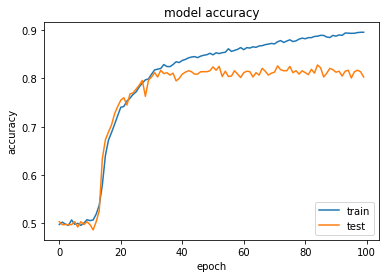

In [12]:
import matplotlib.pyplot as plt
print("11. history.history.keys():\n", history.history.keys(), "\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

In [13]:
# Test the model by our own input

my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_question = "Is the football in the garden ?"
my_data = [(my_story.split(), my_question.split(), 'yes')]

my_story, my_query, my_ans = vectorize_stories(my_data)
p_my_ans = model.predict(([my_story, my_query]))
val_max = np.argmax(p_my_ans[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print("12. Ans: ", k, "\n")

12. Ans:  yes 

